In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Statistical codes
from Swarm_Stats import states_report_swarm
from swarm_stats_plotting2 import  HMFC_percent_figure_NEW, LSS_plot_Swarm_NEW, plot_2hist_quad_maps


In [2]:
date_range = pd.date_range(start='2014-01-01',  end='2014-01-31')
daily_files = '/Users/aotoole/Documents/Python_Code/data/Type_Files/Daily'
NiSw, Sw, PyI = states_report_swarm(date_range, daily_files, typ='eia')
print(NiSw) # Nimo Swarm comparison 

     state direction             type   GLon         LT Sat skill
0     peak     south       peak_south  -16.0  22.622418   A     M
1     peak     south       peak_south  152.0  11.071944   A     M
2     peak     south       peak_south  -36.0  23.049313   A     M
3     peak     south       peak_south  132.0  11.067958   A     M
4     peak     south       peak_south  -60.0  23.081254   A     C
...    ...       ...              ...    ...        ...  ..   ...
2063   eia   neither  eia_saddle_peak -176.0   8.361944   C     F
2064   eia     south        eia_south   -8.0  20.320422   C     H
2065  peak   neither             peak  160.0   8.368056   C     C
2066   eia     south        eia_south  -32.0  20.336360   C     H
2067  peak     south       peak_south  136.0   8.367222   C     C

[2068 rows x 7 columns]


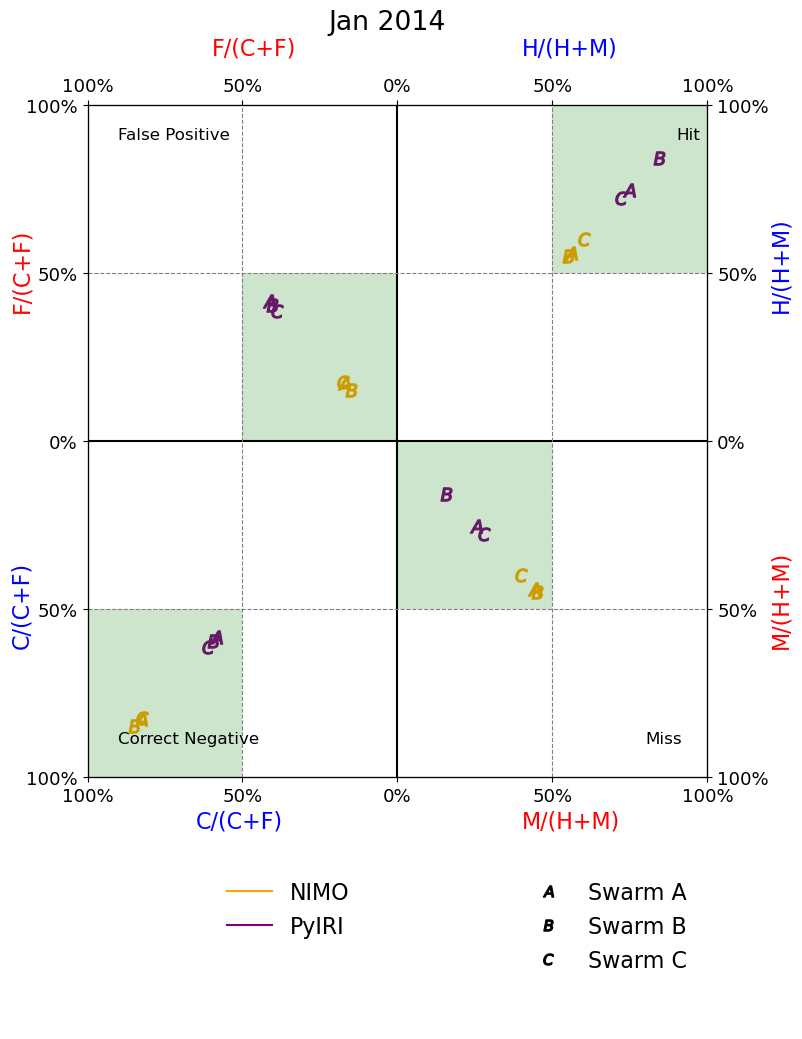

In [3]:
fig = HMFC_percent_figure_NEW(
    NiSw, PyI, 'eia', date_range, model1_name='NIMO',
    model2_name='PyIRI', col1='orange', col2='purple', fosi=16)
#fig.savefig('Jan2014_HMFC_squares.png', bbox_inches='tight')


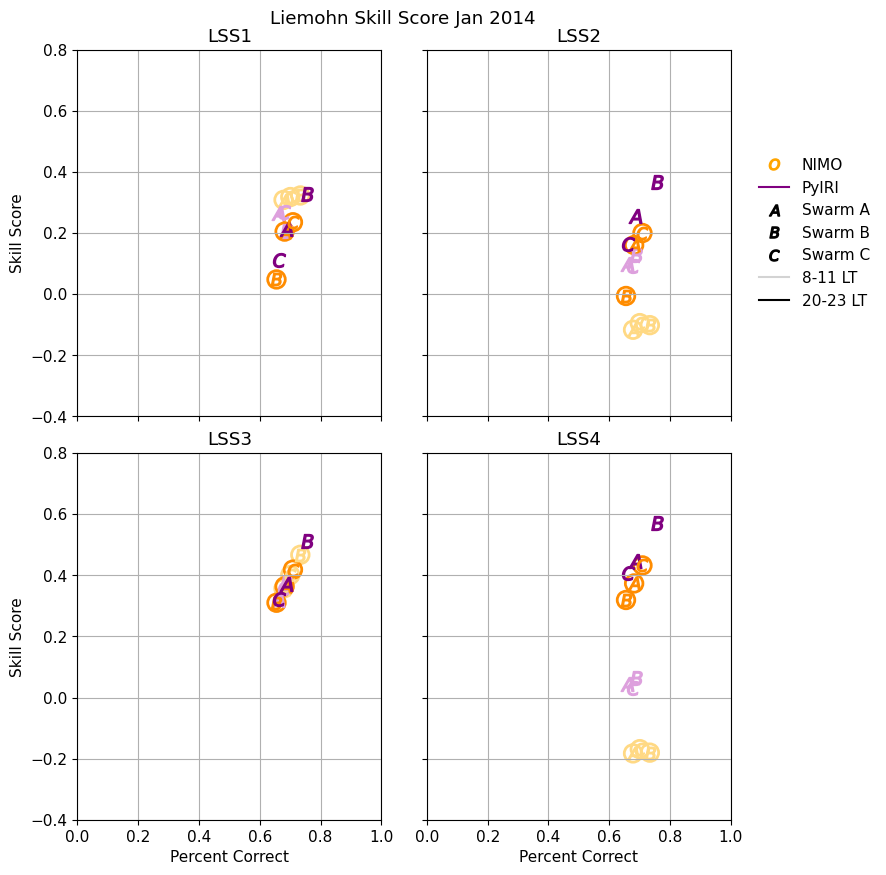

In [4]:
fig = LSS_plot_Swarm_NEW(
    NiSw, PyI, 'EIA', date_range, model1_name='NIMO',
    model2_name='PyIRI', PorC='PC', coin=False,
    lssylim=[-0.4, 0.8]) #[-0.4, 0.8]
#fig.savefig('Jan2014_LSS.png', bbox_inches='tight')

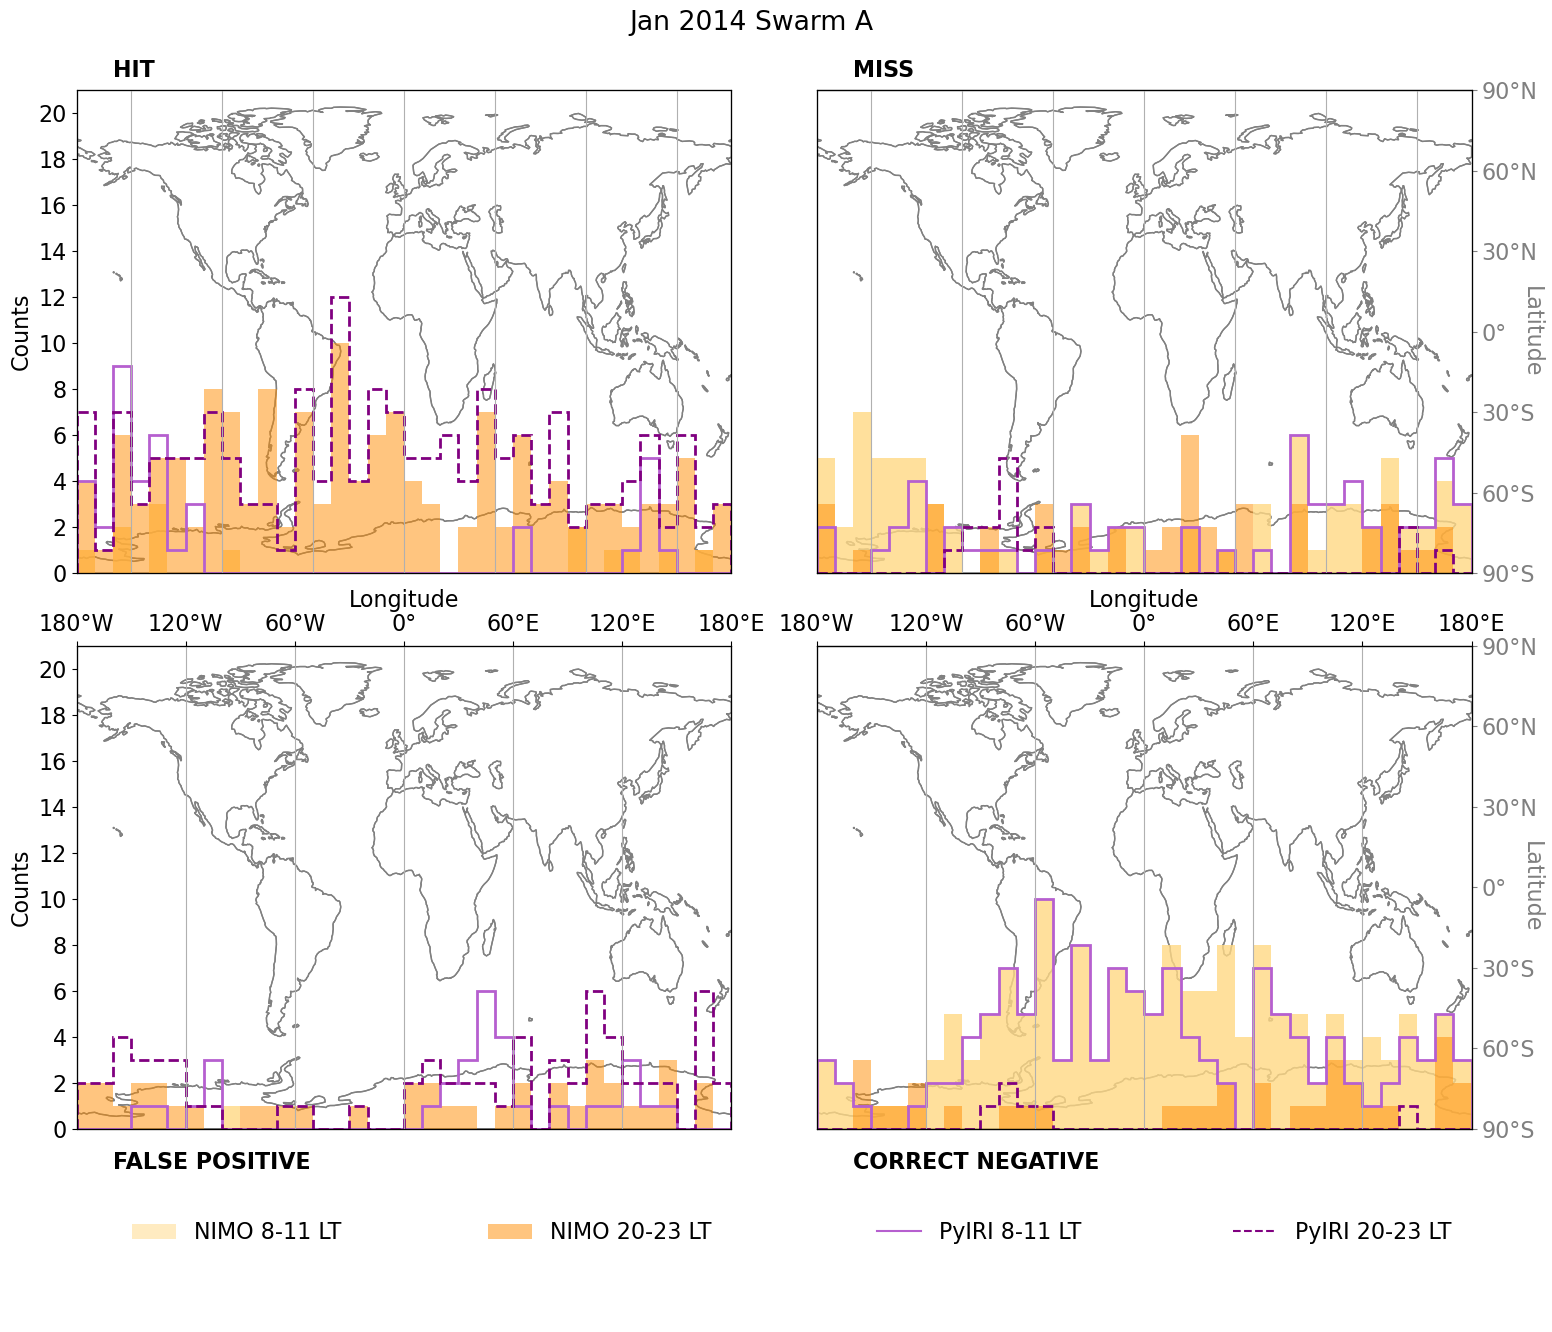

In [5]:
fig = plot_2hist_quad_maps(
    NiSw, PyI, 'A', 'eia', date_range, bin_lons=37,
    model_name='NIMO', model2_name='PyIRI', fosi=16,
    hist_ylim=[0, 21], LT_range=[7, 19])

#fig.savefig('Jan2014_histmapA.png')

In [6]:
tot = []
nim_perc = []
nim_tot = []
nim_all = []
py_perc = []
py_tot = []
py_all = []
typs = np.unique(Sw['type'])

# go through types detected bh
for t in typs:
    tot.append(len(Sw[Sw['type'] == t]))
    Ni_check = NiSw[Sw['type'] == t]
    ln = len(Ni_check[Ni_check['type'] == t])
    pn = ln/len(Ni_check)*100
    nim_perc.append(pn)
    nim_tot.append(ln)
    nim_all.append(len(NiSw[NiSw['type'] == t]))
    Py_check = PyI[Sw['type'] == t]
    lp = len(Py_check[Py_check['type'] == t])
    pp = lp/len(Py_check)*100
    py_perc.append(pp)
    py_tot.append(lp)
    py_all.append(len(PyI[PyI['type'] == t]))
    
df_check = pd.DataFrame()
df_check['Type'] = typs
df_check['Total_Swarm'] = np.array(tot)
df_check['Total_NIMO'] = np.array(nim_tot)
df_check['NIMO_Perc'] = np.array(nim_perc)
df_check['NIM_Guesses'] = np.array(nim_all)
df_check['Total_PyIRI'] = np.array(py_tot)
df_check['PyIRI_Perc'] = np.array(py_perc)
df_check['Py_Guesses'] = np.array(py_all)

df_check

,Type,Total_Swarm,Total_NIMO,NIMO_Perc,NIM_Guesses,Total_PyIRI,PyIRI_Perc,Py_Guesses
0,eia_ghost_peak_north,5,0,0.000000,1,0,0.000000,0
1,eia_ghost_peak_south,53,1,1.886792,16,3,5.660377,216
2,eia_ghost_south,10,1,10.000000,4,0,0.000000,0
3,eia_ghost_symmetric,3,0,0.000000,0,0,0.000000,0
4,eia_north,157,7,4.458599,42,0,0.000000,0
5,eia_saddle_peak,15,0,0.000000,10,0,0.000000,20
6,eia_saddle_peak_north,31,0,0.000000,7,0,0.000000,9
7,eia_saddle_peak_south,95,20,21.052632,196,17,17.894737,208
8,eia_south,558,276,49.462366,463,374,67.025090,771
9,eia_symmetric,174,7,4.022989,54,1,0.574713,8


In [17]:
date_range = pd.date_range(start='2020-04-01',  end='2020-04-30')
daily_files = '/Users/aotoole/Documents/Python_Code/data/Type_Files/Daily'
NiSw, Sw, PyI = states_report_swarm(date_range, daily_files, typ='eia')

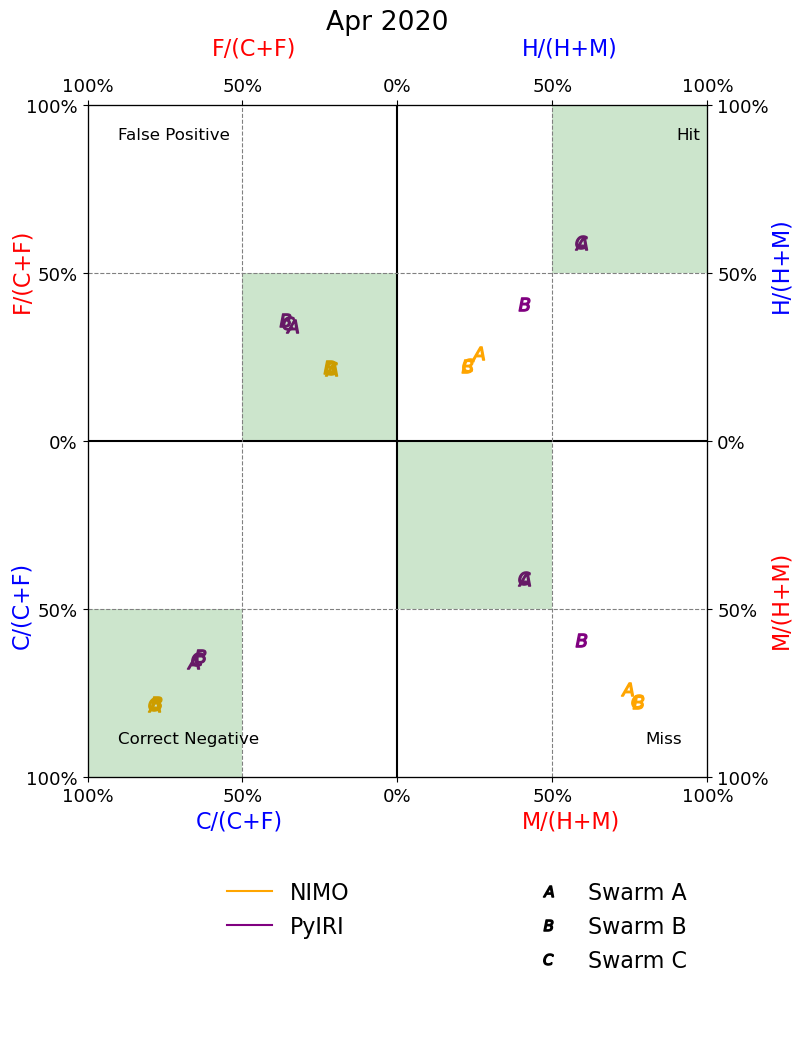

In [18]:
fig = HMFC_percent_figure_NEW(
    NiSw, PyI, 'eia', date_range, model1_name='NIMO',
    model2_name='PyIRI', col1='orange', col2='purple', fosi=16)
# fig.savefig('Apr2020_HMFC_squares.png', bbox_inches='tight')

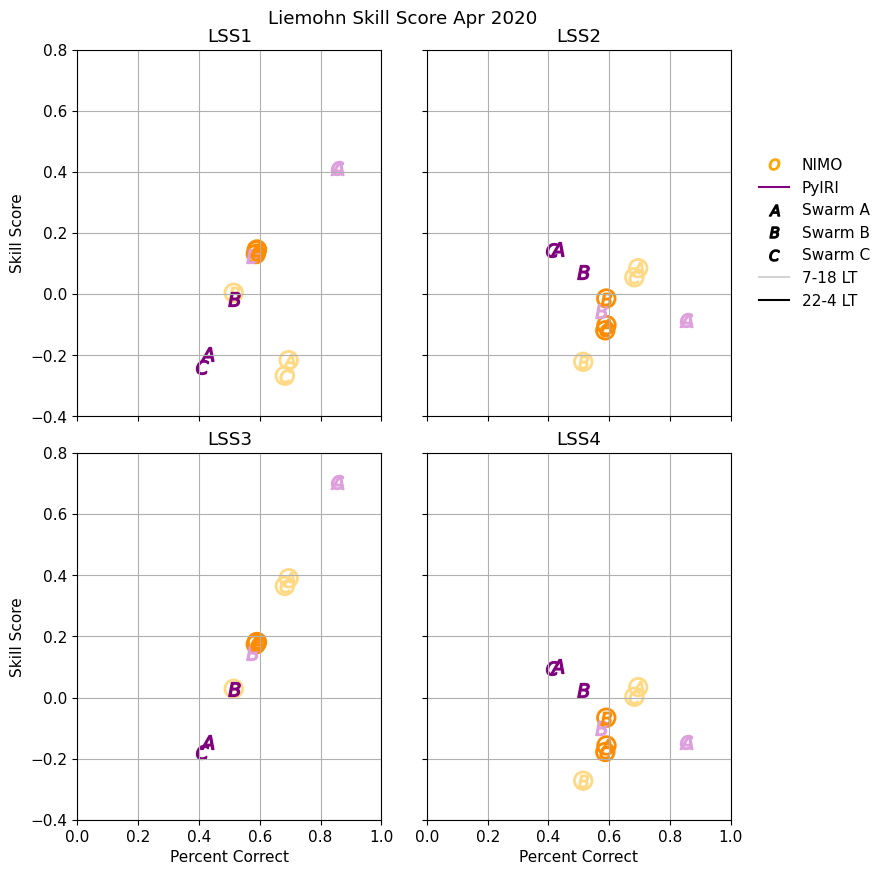

In [19]:
fig = LSS_plot_Swarm_NEW(
    NiSw, PyI, 'EIA', date_range, model1_name='NIMO',
    model2_name='PyIRI', PorC='PC', coin=False,
    lssylim=[-0.4, 0.8])
# fig.savefig('Dec2020_LSS.png', bbox_inches='tight')

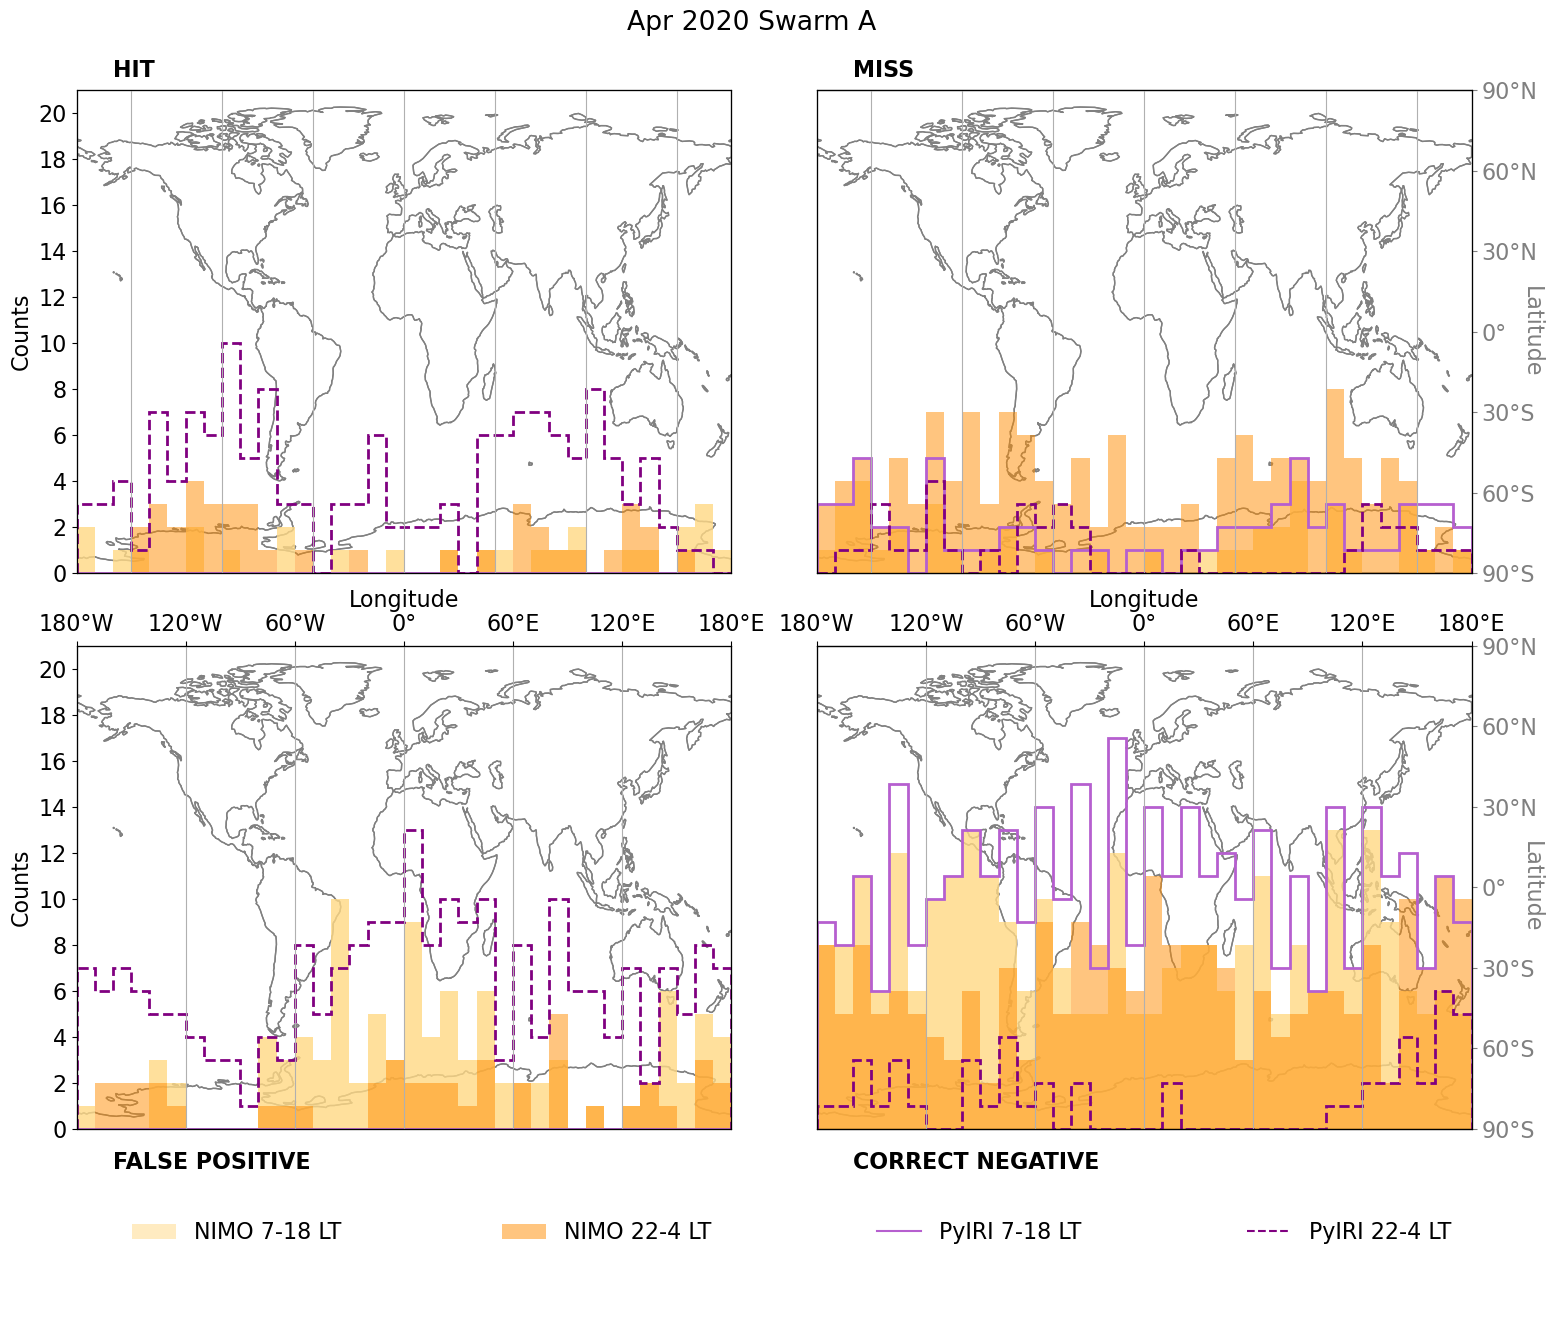

In [21]:
fig = plot_2hist_quad_maps(
    NiSw, PyI, 'A', 'eia', date_range, bin_lons=37,
    model_name='NIMO', model2_name='PyIRI', fosi=16,
    hist_ylim=[0, 21], LT_range=[7, 19])

#fig.savefig('Apr2020_histmapA.png')